In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import warnings
warnings.filterwarnings(action='ignore')

In [13]:
#데이터 불러오기

X = pd.read_csv(r"kmeans_df.csv")

df1 = pd.read_csv(r"LPOINT_BIG_COMP_01_DEMO.csv")
df2 = pd.read_csv(r"LPOINT_BIG_COMP_02_PDDE.csv")
df3 = pd.read_csv(r"LPOINT_BIG_COMP_03_COP_U.csv")
df4 = pd.read_csv(r"LPOINT_BIG_COMP_04_PD_CLAC.csv")
df5 = pd.read_csv(r"LPOINT_BIG_COMP_05_BR.csv")
df6 = pd.read_csv(r"LPOINT_BIG_COMP_06_LPAY.csv")

In [8]:
#데이터 합치기 상품구매정보 + 상품분류정보

df_com= pd.merge(df2, df4, left_on='pd_c', right_on='pd_c', how='left')

In [5]:
#null값 확인

df_com.isnull().sum()

cust                 0
rct_no               0
chnl_dv              0
cop_c                0
br_c            428501
pd_c                 0
de_dt                0
de_hr                0
buy_am               0
buy_ct               0
pd_nm                0
clac_hlv_nm          0
clac_mcls_nm         0
dtype: int64

In [14]:
#클러스터링 그룹별 상품구매정보 구매금액 총 합
cust_0 = X['cust'][X.clustering == 0]
amt_0= df_com['buy_am'][df_com['cust'].isin(cust_0)].sum()

cust_1 = X['cust'][X.clustering == 1]
amt_1= df_com['buy_am'][df_com['cust'].isin(cust_1)].sum()

cust_2 = X['cust'][X.clustering == 2]
amt_2= df_com['buy_am'][df_com['cust'].isin(cust_2)].sum()

cust_3 = X['cust'][X.clustering == 3]
amt_3= df_com['buy_am'][df_com['cust'].isin(cust_3)].sum()

In [17]:
#데이터프레임화

pd.options.display.float_format = '{:.5f}'.format

df_com_0 = pd.DataFrame({'cust_0': amt_0},  index = [0])
df_com_1 = pd.DataFrame({'cust_1': amt_1},  index = [0])
df_com_2 = pd.DataFrame({'cust_2': amt_2},  index = [0])
df_com_3 = pd.DataFrame({'cust_3': amt_3},  index = [0])

df_com_to = pd.concat([df_com_0, df_com_1,df_com_2, df_com_3], axis = 1)


df_com_to = df_com_to.transpose()
df_com_to.columns = ['총 금액']
df_com_to

,총 금액
cust_0,13289171624.00000
cust_1,19515522501.00000
cust_2,15036631784.00000
cust_3,7530513224.00000


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


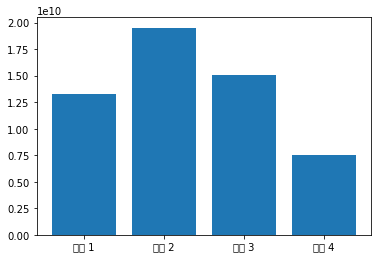

In [18]:
#클러스터링 그룹별 상품구매정보 구매금액 총 합 그래프

y_sum = [amt_0, amt_1, amt_2, amt_3]
x_sum = ['그룹 1', '그룹 2', '그룹 3', '그룹 4']

plt.bar(x_sum , y_sum)
plt.show()

In [19]:
#클러스터링 그룹별 평균 구매 금액

amt0 = amt_0 / len(cust_0)
amt1 = amt_1 / len(cust_1)
amt2 = amt_2 / len(cust_2)
amt3 = amt_3 / len(cust_3)

In [20]:
#데이터프레임화

df_com0 = pd.DataFrame({'cust_0': amt0},  index = [0])
df_com1 = pd.DataFrame({'cust_1': amt1},  index = [0])
df_com2 = pd.DataFrame({'cust_2': amt2},  index = [0])
df_com3 = pd.DataFrame({'cust_3': amt3},  index = [0])


df_com_tog = pd.concat([df_com0, df_com1,df_com2, df_com3], axis = 1)

df_com_tog = df_com_tog.transpose()
df_com_tog.columns = ['평균 구매 금액']
df_com_tog



,평균 구매 금액
cust_0,4709132.39688
cust_1,5869330.07549
cust_2,8390977.55804
cust_3,8509054.49040


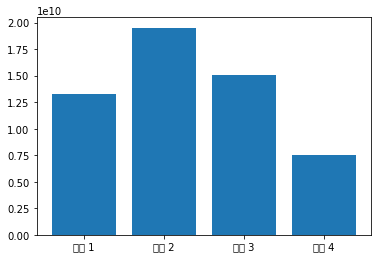

In [21]:
#클러스터링 그룹별 상품구매정보 구매금액 평균 합 그래프

y_mean = [amt0, amt1, amt2, amt3]
x_sum = ['그룹 1', '그룹 2', '그룹 3', '그룹 4']

plt.bar(x_sum , y_sum)
plt.show()